In [1]:
import os

import numpy as np
import importlib
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.animation as manimation

import gym_env
import utils
from models import LinearRL_NHB
from utils_render import plot_decision_prob
from utils import policy_reval, decision_policy, woodbury

In [2]:
# Set the random seed for NumPy
seed = 42
np.random.seed(42)

# Save dir
save_dir = os.path.join('..', 'figures/')

In [3]:
# For plotting
prob_locs = [1, 2]
colors = [3, 2]

In [74]:
# Difference ~ 8 : _lambda=10, alpha=0.25, beta=0.7, num_steps=250
# Difference ~ 8 : lambda=10, alpha=0.6, beta=0.7, num_steps=100

# Hyperparameters
lambd = 10
alpha = 0.25
beta = 0.7
num_steps = 250

# Policy Revaluation

### Construct Average DR

In [75]:
num_iterations = 400

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=lambd, alpha=alpha, beta=beta, num_steps=num_steps, policy="softmax", imp_samp=True, exp_type="policy_reval")
    agent_no_imp = LinearRL_NHB(_lambda=lambd, alpha=alpha, beta=beta, num_steps=num_steps, policy="softmax", imp_samp=False, exp_type="policy_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations

## With Importance Sampling

In [76]:
# Original training policy
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Policy revaluation
agent_with_imp.update_exp()
V_new, Z_new = policy_reval(agent_with_imp)
pii_new = decision_policy(agent_with_imp, Z_new)

In [77]:
print(pii_old[0])
print(pii_new[0])

[0.         0.12881807 0.87118193 0.         0.         0.
 0.         0.         0.        ]
[0.         0.64849864 0.35150136 0.         0.         0.
 0.         0.         0.        ]


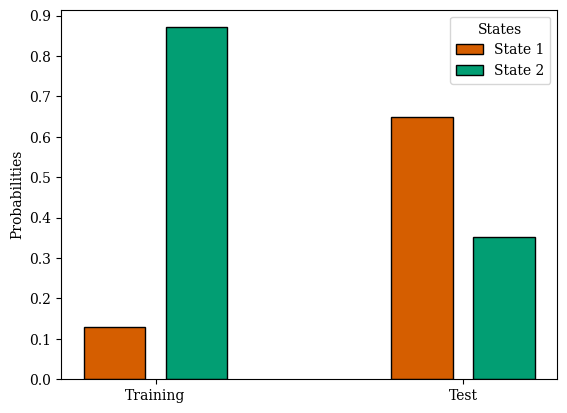

In [78]:
save_path = save_dir + 'policy_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None, title=None)

In [37]:
policy_test = pii_new[0][1]

## Without Importance Sampling

In [10]:
# Original training policy
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Policy revaluation
agent_no_imp.update_exp()
V_new, Z_new = policy_reval(agent_no_imp)
pii_new = decision_policy(agent_no_imp, Z_new)

In [11]:
print(pii_old[0])
print(pii_new[0])

[0.         0.11671721 0.88328279 0.         0.         0.
 0.         0.         0.        ]
[0.         0.36270941 0.63729059 0.         0.         0.
 0.         0.         0.        ]


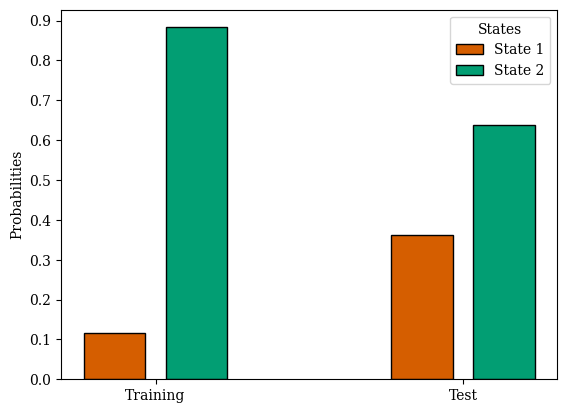

In [12]:
save_path = save_dir + 'policy_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Reward Revaluation

### Construct Average DR

In [79]:
num_iterations = 400

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=lambd, alpha=alpha, beta=beta, num_steps=num_steps, policy="softmax", imp_samp=True, exp_type="reward_reval")
    agent_no_imp = LinearRL_NHB(_lambda=lambd, alpha=alpha, beta=beta, num_steps=num_steps, policy="softmax", imp_samp=False, exp_type="reward_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations

## With Importance Sampling

In [80]:
# Original training policy
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Reward revaluation
agent_with_imp.update_exp()
V_new, Z_new = policy_reval(agent_with_imp)
pii_new = decision_policy(agent_with_imp, Z_new)

In [81]:
print(pii_old[0][1], pii_old[0][2])
print(pii_new[0])

[0.        0.1598778 0.8401222 0.        0.        0.        0.
 0.        0.       ]
[0.        0.7279193 0.2720807 0.        0.        0.        0.
 0.        0.       ]


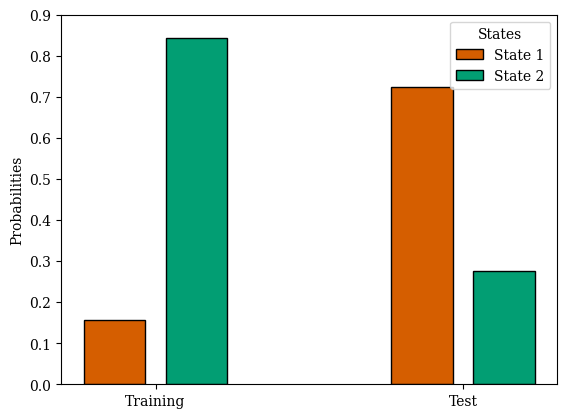

In [16]:
save_path = save_dir + 'reward_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

In [17]:
reward_test = pii_new[0][1]

In [18]:
reward_test

0.723703173428781

## Without Importance Sampling

In [19]:
# Original training policy
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Reward revaluation
agent_no_imp.update_exp()
V_new, Z_new = policy_reval(agent_no_imp)
pii_new = decision_policy(agent_no_imp, Z_new)

In [20]:
print(pii_old[0])
print(pii_new[0])

[0.         0.11281196 0.88718804 0.         0.         0.
 0.         0.         0.        ]
[0.         0.68243492 0.31756508 0.         0.         0.
 0.         0.         0.        ]


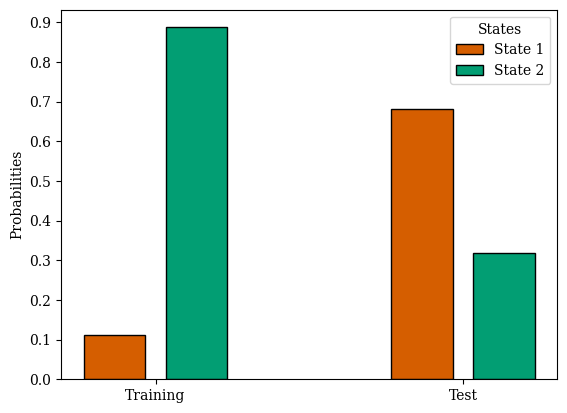

In [21]:
save_path = save_dir + 'reward_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Transition Revaluation

### Construct Average DR

In [22]:
num_iterations = 400

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=lambd, alpha=alpha, beta=beta, num_steps=num_steps, policy="softmax", imp_samp=True, exp_type="trans_reval")
    agent_no_imp = LinearRL_NHB(_lambda=lambd, alpha=alpha, beta=beta, num_steps=num_steps, policy="softmax", imp_samp=False, exp_type="trans_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations

## With Importance Sampling

In [23]:
# Original training task
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Transition revaluation
T_new = agent_with_imp.construct_T_new()
D_new = woodbury(agent=agent_with_imp, T=T_new, inv=False)
agent_with_imp.DR = D_new
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_new = decision_policy(agent_with_imp, agent_with_imp.Z)

In [24]:
print(pii_old[0])
print(pii_new[0])

[0.        0.1521865 0.8478135 0.        0.        0.        0.
 0.        0.       ]
[0.         0.78573457 0.21426543 0.         0.         0.
 0.         0.         0.        ]


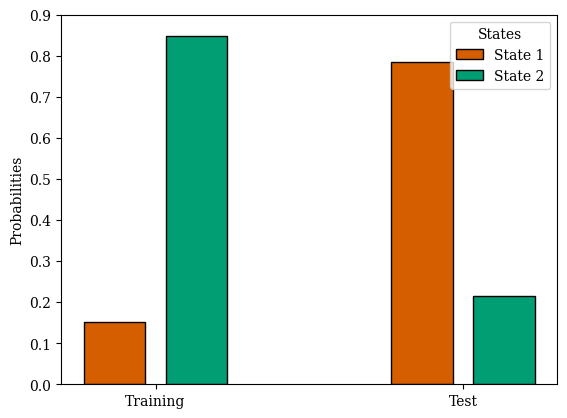

In [25]:
save_path = save_dir + 'transition_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

## Without Importance Sampling

In [26]:
# Original training task
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Transition revaluation
T_new = agent_no_imp.construct_T_new()
D_new = woodbury(agent=agent_no_imp, T=T_new, inv=False)
agent_no_imp.DR = D_new
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_new = decision_policy(agent_no_imp, agent_no_imp.Z)

In [27]:
print(pii_old[0])
print(pii_new[0])

[0.         0.11206446 0.88793554 0.         0.         0.
 0.         0.         0.        ]
[0.         0.48516742 0.51483258 0.         0.         0.
 0.         0.         0.        ]


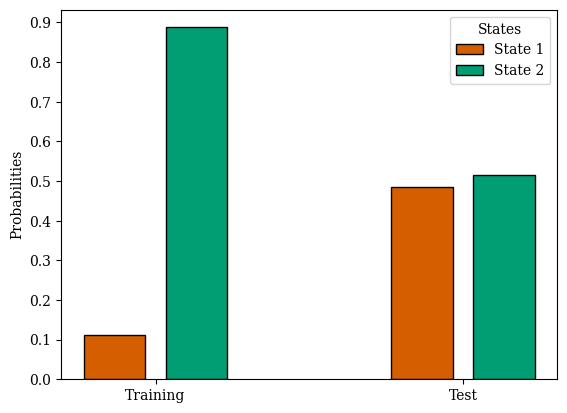

In [28]:
save_path = save_dir + 'transition_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Plot NHB values against ours

In [94]:
def create_bar_plot(means, colors, ylabel, xlabels, std=None, title=None, save_path=None):
    color_palette = sns.color_palette("colorblind")
    color_list = []
    for color in colors:
        color_list.append(color_palette[color])

    # Set the style and font
    plt.rcParams['font.family'] = 'serif'
    
    # Create the plot
    fig, ax = plt.subplots()
    x = np.arange(len(means)) * 0.7
    
    # Plot the bars with black edge color
    bars = ax.bar(x, means, color=color_list, edgecolor='black', linewidth=1, width=0.45)
    
    # Add error bars if std is provided
    if std is not None:
        ax.errorbar(x, means, yerr=std, fmt='none', color='black', capsize=0)
    
    # Customize the plot
    ax.set_ylabel(ylabel)
    ax.set_title(title) if title else None
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=0, ha='center')
    
    # Set y-axis limits and ticks
    ax.set_ylim(0, 0.85)  # Set upper limit slightly above 0.8
    ax.set_yticks(np.arange(0, 0.81, 0.2))
    
    # Add black border to all spines
    for spine in ['left', 'right', 'bottom', 'top']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(1)
    
    # Remove grid
    ax.grid(False)
    
    # Set background color to white
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

## NHB reconstruction

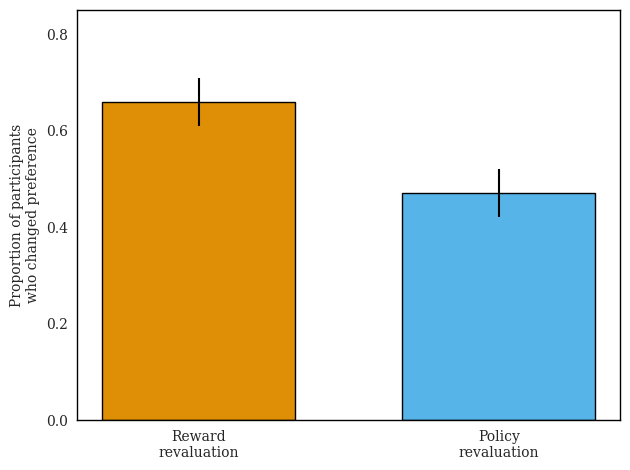

In [96]:
save_path = save_dir + "NHB_data.png"
nhb_means = [0.66, 0.47]
nhb_stds = [0.05, 0.05]
xlabels = ['Reward\nrevaluation', 'Policy\nrevaluation']
colors = [1, 9]
ylabel = 'Proportion of participants\nwho changed preference'

# Call the function
create_bar_plot(nhb_means, colors, ylabel, xlabels, std=nhb_stds, save_path=save_path)

## Our Values

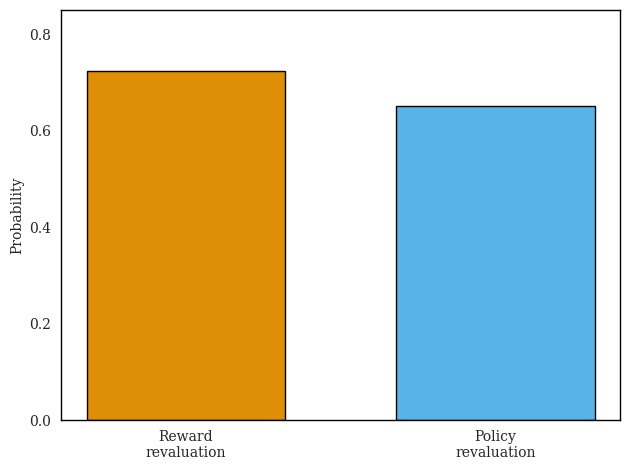

In [99]:
save_path = save_dir + "NHB_model.png"
means = [reward_test, policy_test]
xlabels = ['Reward\nrevaluation', 'Policy\nrevaluation']
colors = [1, 9]
ylabel = 'Probability'

# Call the function
create_bar_plot(means, colors, ylabel, xlabels, save_path=save_path)